In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

**Reading the data**

In [5]:
data = pd.read_csv("/kaggle/input/dc-crime-dataset-2021/DC Crime data 2021.csv")
data.head(2)

X          Y       CCN              REPORT_DAT     SHIFT  METHOD  \
0 -76.971234  38.853023  21132080  2021/09/15 07:26:45+00  MIDNIGHT     GUN   
1 -77.032732  38.929525  21050701  2021/04/21 18:08:01+00       DAY  OTHERS   

                      OFFENSE                                BLOCK  \
0  ASSAULT W/DANGEROUS WEAPON   IRVING STREET SE AND 24TH PLACE SE   
1                 THEFT/OTHER  3100 - 3299 BLOCK OF 14TH STREET NW   

          XBLOCK         YBLOCK  ...  BLOCK_GROUP CENSUS_TRACT  \
0  402497.110016  131690.000024  ...     007408 2       7408.0   
1  397162.060000  140182.430000  ...     002802 1       2802.0   

   VOTING_PRECINCT   LATITUDE  LONGITUDE  BID              START_DATE  \
0     Precinct 115  38.853015 -76.971232  NaN  2021/09/15 02:56:00+00   
1      Precinct 39  38.929517 -77.032730  NaN  2021/04/21 16:52:32+00   

                 END_DATE   OBJECTID  OCTO_RECORD_ID  
0  2021/09/16 02:58:00+00  335627463             NaN  
1  2021/04/21 18:08:48+00  336138553             NaN  

[2 rows x 25 columns]

**Data cleaning ->** Dropping the extra columns that are not required at the moment

In [6]:
data.drop(labels=['X', 'Y', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],axis=1,inplace=True)

**Data cleaning ->** Renaming the Date column for clarity. This will be a useful column for the analysis

In [7]:
data.rename(columns = {'REPORT_DAT':'Date',}, inplace = True)

Based on the remaining attributes, we can analyze the data in the following ways:

> 1. **Offense categories**: The distribution of offense types
> 2. **Crime time series analysis**: Viewing how the crime instances have fluctuated over the course of the year. We can look at monthly and weekly patterns
> 3. **Geographical distribution of crimes**: We can view the distribution of these crimes across DC. This specifically is a point of interest for me. I will be looking at the proximity of these crimes to George Washington University


In [8]:
data.head()

CCN                    Date     SHIFT  METHOD  \
0  21132080  2021/09/15 07:26:45+00  MIDNIGHT     GUN   
1  21050701  2021/04/21 18:08:01+00       DAY  OTHERS   
2  21061917  2021/05/13 16:01:46+00       DAY  OTHERS   
3  21064560  2021/05/18 18:34:15+00       DAY  OTHERS   
4  21009939  2021/01/22 22:36:30+00   EVENING  OTHERS   

                      OFFENSE  DISTRICT   LATITUDE  LONGITUDE  
0  ASSAULT W/DANGEROUS WEAPON       7.0  38.853015 -76.971232  
1                 THEFT/OTHER       3.0  38.929517 -77.032730  
2                THEFT F/AUTO       4.0  38.952908 -77.031561  
3                 THEFT/OTHER       4.0  38.963764 -77.001400  
4                THEFT F/AUTO       3.0  38.923763 -77.028874

In [9]:
data.describe()

CCN      DISTRICT      LATITUDE     LONGITUDE
count  2.836400e+04  28185.000000  28364.000000  28364.000000
mean   2.110960e+07      3.660458     38.907805    -77.008514
std    4.868813e+05      1.840953      0.029712      0.034736
min    1.000888e+07      1.000000     38.819387    -77.110926
25%    2.105310e+07      2.000000     38.894993    -77.031788
50%    2.110266e+07      3.000000     38.907825    -77.012434
75%    2.114875e+07      5.000000     38.923968    -76.986909
max    9.915749e+07      7.000000     38.994217    -76.910012

**Distribution of crimes by offense type ->** Creating a dataframe to extract the counts of each offense type

In [10]:
crime_types=data.groupby(['OFFENSE'])['CCN'].count()
crime_types=pd.DataFrame(data=crime_types)
crime_types.head()

CCN
OFFENSE                         
ARSON                          4
ASSAULT W/DANGEROUS WEAPON  1664
BURGLARY                    1175
HOMICIDE                     224
MOTOR VEHICLE THEFT         3487

In [11]:
crime_types.rename(columns={"CCN":"Count"},inplace=True)
crime_types

Count
OFFENSE                          
ARSON                           4
ASSAULT W/DANGEROUS WEAPON   1664
BURGLARY                     1175
HOMICIDE                      224
MOTOR VEHICLE THEFT          3487
ROBBERY                      2045
SEX ABUSE                     180
THEFT F/AUTO                 8684
THEFT/OTHER                 10901

In [12]:
crime_types.reset_index(inplace=True)
crime_types

OFFENSE  Count
0                       ARSON      4
1  ASSAULT W/DANGEROUS WEAPON   1664
2                    BURGLARY   1175
3                    HOMICIDE    224
4         MOTOR VEHICLE THEFT   3487
5                     ROBBERY   2045
6                   SEX ABUSE    180
7                THEFT F/AUTO   8684
8                 THEFT/OTHER  10901

**Crime offense distribution ->** Viewing the crime distribution with a bar graph

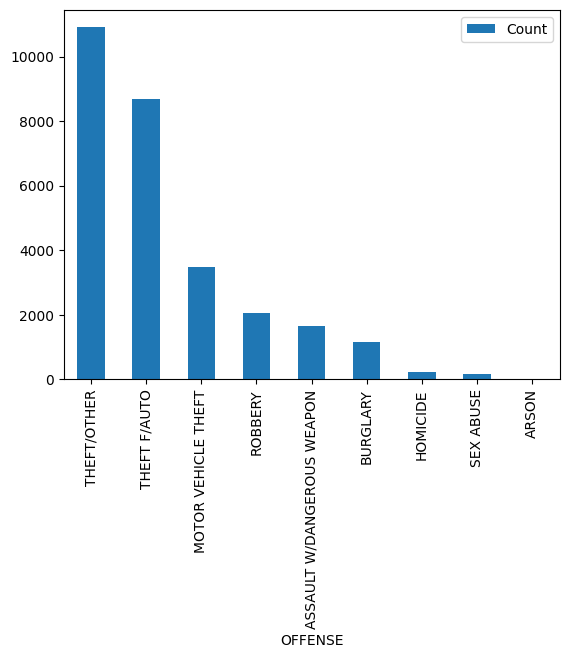

In [13]:
crime_types.sort_values(by='Count',inplace=True,ascending=False)
crime_types.plot(kind='bar',x='OFFENSE',y='Count')
#plt.figlegend(crime_types['OFFENSE'])
plt.show()

**Visualizing the same distribution using a Waffle chart to gain some perspective**

In [55]:
!pip install pywaffle


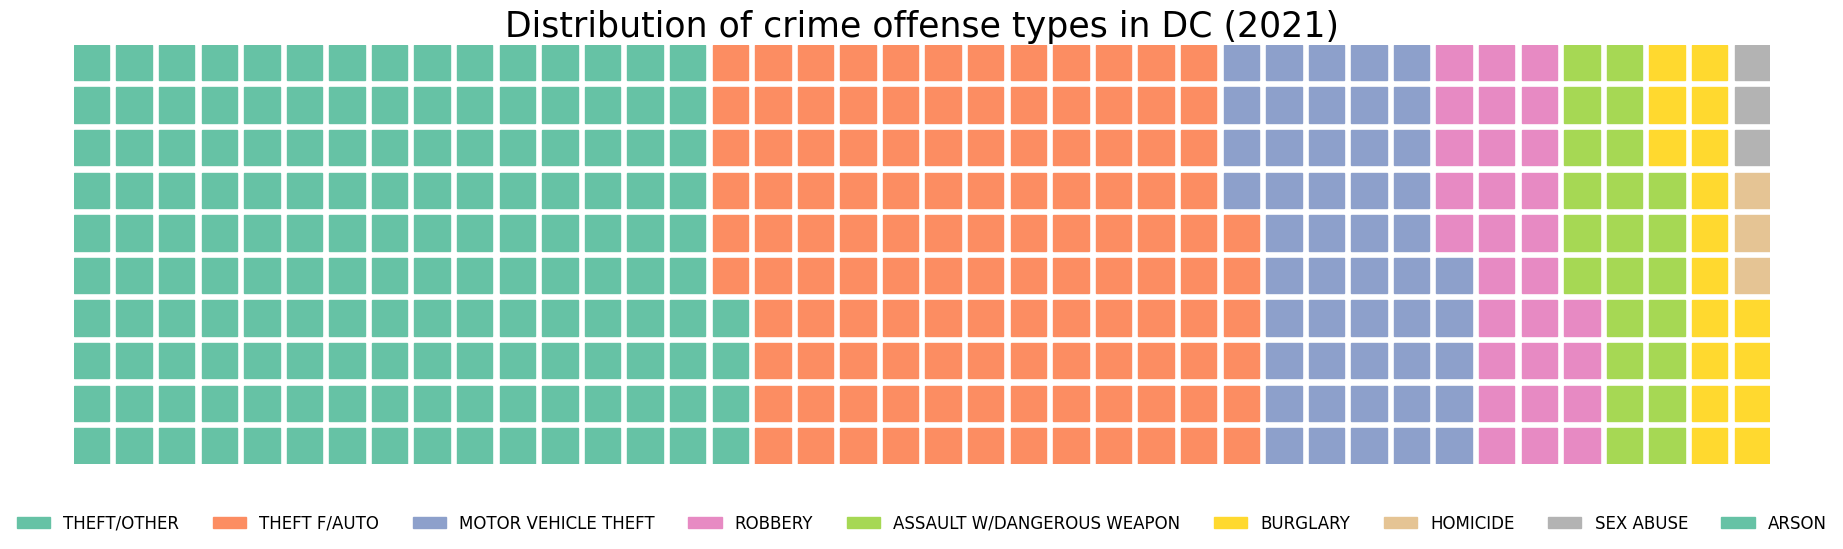

In [114]:
from pywaffle import Waffle

# Sort the DataFrame by the offense counts
crime_types = crime_types.sort_values('Count', ascending=False)

# Calculate the total count of offenses
total_count = crime_types['Count'].sum()

# Calculate the percentage of each offense count
crime_types['Percentage'] = crime_types['Count'] / total_count

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=40,
    values=crime_types['Count'],
    labels=list(crime_types['OFFENSE']),
    legend={
        'loc': 'lower center',
        'bbox_to_anchor': (0.5, -0.2),
        'ncol': len(crime_types['OFFENSE']),
        'framealpha': 0,
        'fontsize': 12
    },
    figsize=(20, 20)  # Figure size
)

plt.title('Distribution of crime offense types in DC (2021)',fontsize=25)

plt.show()

**Time series analysis ->** We need to process the data slightly in order to extract time series trends effectively

In [14]:
data['Date'] = pd.to_datetime(data['Date'])  # Converting 'Date' column to the appropriate type

# Extracting the date and time 
data['Date_only'] = data['Date'].dt.date
data['Time_only'] = data['Date'].dt.time  

# Extracting the Day of the week and the month
data['Date_only'] = pd.to_datetime(data['Date_only'])  
data['Day_of_Week'] = data['Date_only'].dt.day_name()  
data['Month'] = data['Date_only'].dt.month_name()  

data.head()

CCN                      Date     SHIFT  METHOD  \
0  21132080 2021-09-15 07:26:45+00:00  MIDNIGHT     GUN   
1  21050701 2021-04-21 18:08:01+00:00       DAY  OTHERS   
2  21061917 2021-05-13 16:01:46+00:00       DAY  OTHERS   
3  21064560 2021-05-18 18:34:15+00:00       DAY  OTHERS   
4  21009939 2021-01-22 22:36:30+00:00   EVENING  OTHERS   

                      OFFENSE  DISTRICT   LATITUDE  LONGITUDE  Date_only  \
0  ASSAULT W/DANGEROUS WEAPON       7.0  38.853015 -76.971232 2021-09-15   
1                 THEFT/OTHER       3.0  38.929517 -77.032730 2021-04-21   
2                THEFT F/AUTO       4.0  38.952908 -77.031561 2021-05-13   
3                 THEFT/OTHER       4.0  38.963764 -77.001400 2021-05-18   
4                THEFT F/AUTO       3.0  38.923763 -77.028874 2021-01-22   

  Time_only Day_of_Week      Month  
0  07:26:45   Wednesday  September  
1  18:08:01   Wednesday      April  
2  16:01:46    Thursday        May  
3  18:34:15     Tuesday        May  
4  22:36:30      Friday    January

In [15]:
#Creating Time series data for total crimes
time_data=data.groupby(['Date_only'])['CCN'].count()
time_data=pd.DataFrame(data=time_data)
time_data.rename(columns={"CCN":"Crime Count"},inplace=True)
time_data.head()


Crime Count
Date_only              
2021-01-01           30
2021-01-02           67
2021-01-03           88
2021-01-04           61
2021-01-05           71

<function matplotlib.pyplot.show(close=None, block=None)>

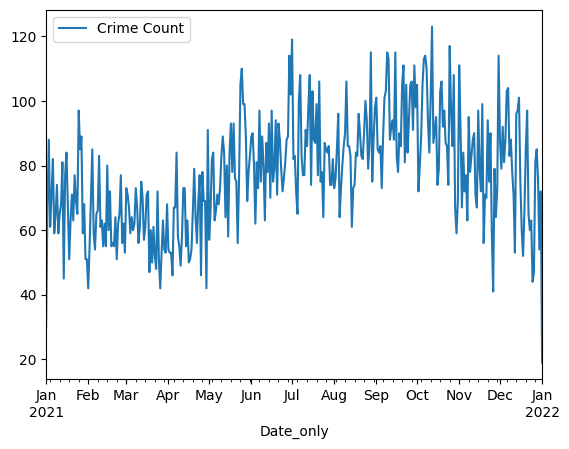

In [16]:
time_data.plot(kind='line')
plt.show

**Time series analysis ->** While the day to day crime totals seem irregular, there seems to be some long term patterns during the course of the year. We can further explore this using the monthly and weekly trends

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


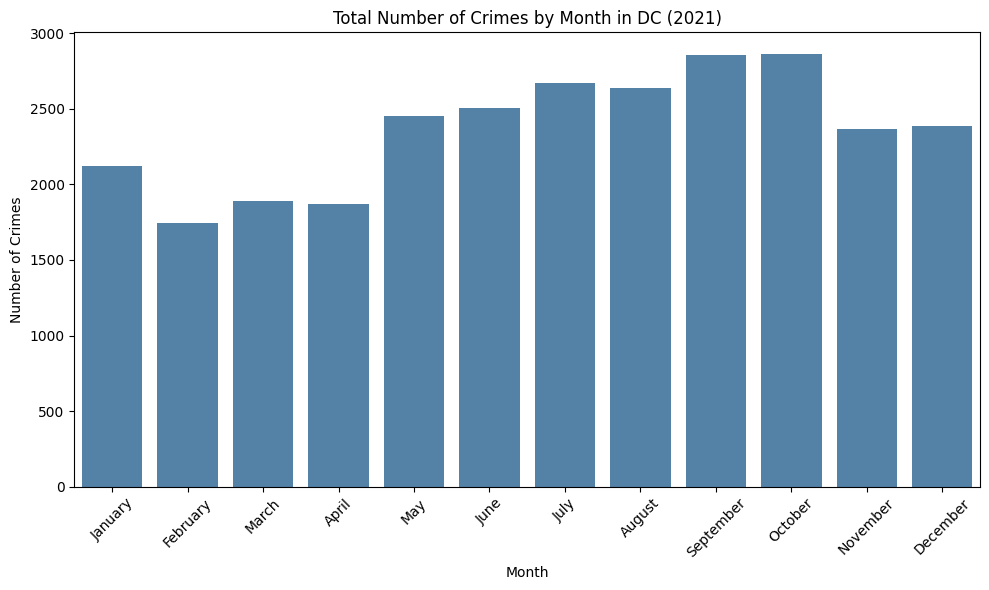

In [17]:
import seaborn as sns

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

crimes_by_month = data['Month'].value_counts().loc[month_order]

# Creating a bar plot for crimes by month
plt.figure(figsize=(10, 6)) 
sns.barplot(x=crimes_by_month.index, y=crimes_by_month.values, color='steelblue')  # Create the bar plot
plt.xlabel('Month')  
plt.ylabel('Number of Crimes')  
plt.title('Total Number of Crimes by Month in DC (2021)')  
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()  


**The total crimes shows a steady increase over the course of the year, peaking in October** 

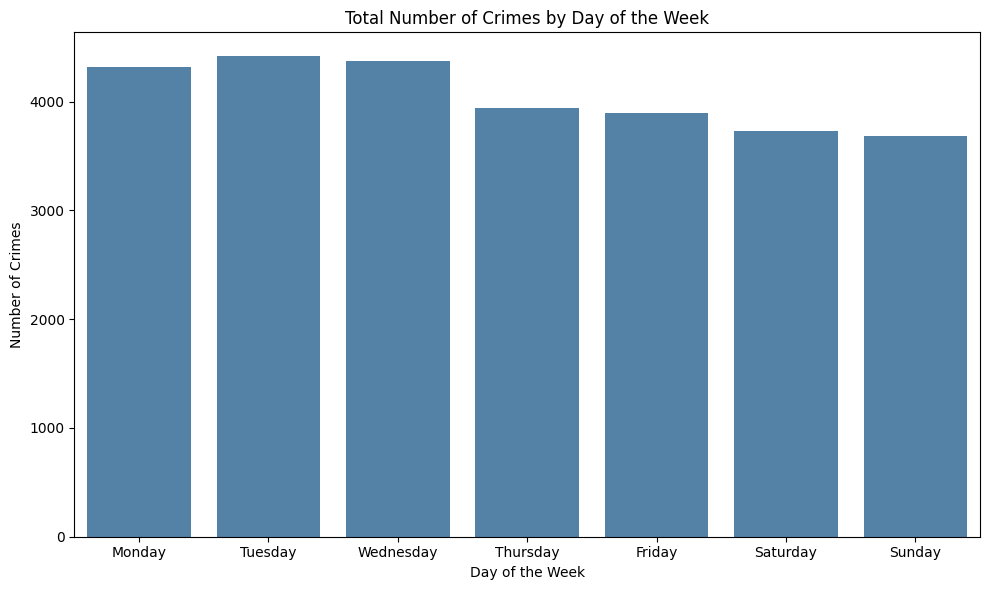

In [18]:

# Counting the number of crimes by day of the week
crimes_by_day = data['Day_of_Week'].value_counts().loc[day_order]

# Creating a bar plot for crimes by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=crimes_by_day.index, y=crimes_by_day.values, color='steelblue')  # Create the bar plot
plt.xlabel('Day of the Week')  
plt.ylabel('Number of Crimes')  
plt.title('Total Number of Crimes by Day of the Week')  
plt.tight_layout()  
plt.show()  

**During the week, crimes peak in midweek and are lowest on Sundays** 

**Geo-Spatial analysis ->** Using the latitude and longitude in the data, we can analyze where these crimes take place and cluster them

In [19]:
import folium
from folium.plugins import MarkerCluster

#Sampling
sampled_data = data.sample(frac=0.1)

# Creating a map centred in DC
dc_map = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Creating a marker cluster group
marker_cluster = MarkerCluster().add_to(dc_map)

# Iterating over the sampled data
for index, row in sampled_data.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']],
                  popup=row['OFFENSE'],
                  icon=folium.Icon(color='red', icon='info-sign')).add_to(marker_cluster)

# Show map
dc_map


**Geo-Spatial analysis ->** Creating a Choropleth map of violent crimes. I wish to look at the number of violent crimes by districs and view their proximity to George Washington University

In [20]:
data['OFFENSE'].unique()

array(['ASSAULT W/DANGEROUS WEAPON', 'THEFT/OTHER', 'THEFT F/AUTO',
       'MOTOR VEHICLE THEFT', 'HOMICIDE', 'ROBBERY', 'BURGLARY',
       'SEX ABUSE', 'ARSON'], dtype=object)

In [21]:
violent_crimes = data[(data['OFFENSE'] == 'HOMICIDE') | (data['OFFENSE'] == 'SEX ABUSE')| (data['OFFENSE'] == 'ASSAULT W/DANGEROUS WEAPON')]
violent_crimes.head()

CCN                      Date     SHIFT METHOD  \
0   21132080 2021-09-15 07:26:45+00:00  MIDNIGHT    GUN   
6   21009412 2021-01-21 05:00:00+00:00  MIDNIGHT    GUN   
13  21050058 2021-04-20 08:41:24+00:00  MIDNIGHT    GUN   
25  21063615 2021-05-16 22:18:11+00:00   EVENING  KNIFE   
66  21179209 2021-12-08 22:36:29+00:00   EVENING    GUN   

                       OFFENSE  DISTRICT   LATITUDE  LONGITUDE  Date_only  \
0   ASSAULT W/DANGEROUS WEAPON       7.0  38.853015 -76.971232 2021-09-15   
6                     HOMICIDE       7.0  38.825089 -77.001446 2021-01-21   
13  ASSAULT W/DANGEROUS WEAPON       4.0  38.943467 -77.036429 2021-04-20   
25  ASSAULT W/DANGEROUS WEAPON       5.0  38.899976 -76.982460 2021-05-16   
66  ASSAULT W/DANGEROUS WEAPON       6.0  38.896890 -76.934067 2021-12-08   

   Time_only Day_of_Week      Month  
0   07:26:45   Wednesday  September  
6   05:00:00    Thursday    January  
13  08:41:24     Tuesday      April  
25  22:18:11      Sunday        May  
66  22:36:29   Wednesday   December

**Using a json file to depict the district boundary markers**

In [51]:
import geopandas as gpd

dc_districts_geojson = '/kaggle/input/dc-districts/police-districts-mpd.geojson'
district_geo_data = gpd.read_file(dc_districts_geojson)

# Counting the number of crimes by district
district_crime_count = violent_crimes['DISTRICT'].value_counts().reset_index()
district_crime_count.columns = ['DISTRICT', 'CRIME_COUNT']

dc_map = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

folium.Choropleth(
    geo_data=district_geo_data,
    name='choropleth',
    data=district_crime_count,
    columns=['DISTRICT', 'CRIME_COUNT'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Violent Crimes',
    highlight=True
).add_to(dc_map)

folium.LayerControl().add_to(dc_map)





label_text = 'George Washington University'
label = folium.Marker(location=[38.89850, -77.05060], icon=folium.DivIcon(html=f'<div style="font-weight:bold">{label_text}</div>'))
label.add_to(dc_map)

# adding a location market for George Washington University
home_icon = folium.Icon(icon='home', prefix='fa', color='blue')
home_marker = folium.Marker(location=[38.90040, -77.04856], icon=home_icon)
home_marker.add_to(dc_map)


#annotation = folium.Marker(location=[38.90040, -77.04856], popup=folium.Popup('George Washington University', max_width=300))
#annotation.add_to(dc_map)

dc_map
